# BBM 469 - DATA SCIENCE CAPSTONE PROJECT 
**Öğrenci Adları**: Gökhan Özeloğlu - 21627557 / Ali Kayadibi - 21727432

**Eğitmen**: Fuat AKAL - Ahmet ALKILINÇ


## İçerik

[Problem](#problem)   
[Verinin Anlaşılması](#data_understanding)   
[Verilerin Hazırlanması](#data_preparation)   
[Modelleme](#modeling)   
[Değerlendirme](#evaluation)   
[Referanslar](#references)   



## Problem <a class="anchor" id="problem"></a>

# Bel Ağrısı Belirtisi Tespiti

Bel ağrısı, bel omurgasındaki karmaşık, birbirine bağlı omurga kasları, sinirler, kemikler, diskler veya tendonların herhangi bir bölümündeki çeşitli sorunlardan kaynaklanabilir. Bel ağrısı kaynakları genel olarak şunları içerir:

* Alt sırttaki bacaklara giden büyük sinir kökleri tahriş olmuş olabilir.
* Bel bölgesini besleyen daha küçük sinirler tahriş olmuş olabilir.
* Büyük eşleştirilmiş alt sırt kasları (erektör omurgası) gergin olabilir.
* Kemikler, bağlar veya eklemler hasar görmüş görebilir
* Bir intervertebral disk dejenere olmuş olabilir

Bu yapılardan herhangi biriyle ilgili bir tahriş veya sorun, bel ağrısına ve / veya vücudun diğer bölgelerine yayılan veya bu bölgelere yönlendirilen ağrıya neden olabilir. Pek çok bel problemi aynı zamanda sırt kaslarında spazma neden olabilir. Bu çok bir şey gibi görünmeyebilir ama şiddetli ağrı ve sakatlığa neden olabilir.

Bel ağrısı son derece yaygın olsa da, bel ağrısının semptomları ve şiddeti büyük ölçüde değişir.Basit bir bel kası gerginliği, acil servise gitmeyi gerektirecek kadar dayanılmaz olabilirken, dejenere bir disk yalnızca hafif, aralıklı rahatsızlığa neden olabilir.

Bu projede, bir kişinin normal veya anormal olduğunu belirlemek istedik. **Sınıflandırıcı Makine Öğrenmesi** modelleri kullandık. Modelleri oluşturmadan, eğitmeden ve test etmeden önce, veri kümesine ön işleme adımlarını uyguladık. 

## Verinin Anlaşılması<a class="anchor" id="data_understanding"></a>

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset_spine.csv")
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [74]:
print("Dataframe shape:", df.shape)

Dataframe shape: (310, 14)


In [75]:
df["Unnamed: 13"].unique()

array([nan, 'Prediction is done by using binary classification.',
       'Attribute1  = pelvic_incidence  (numeric) ',
       'Attribute2 = pelvic_tilt (numeric) ',
       'Attribute3 = lumbar_lordosis_angle (numeric) ',
       'Attribute4 = sacral_slope (numeric) ',
       'Attribute5 = pelvic_radius (numeric) ',
       'Attribute6 = degree_spondylolisthesis (numeric) ',
       ' Attribute7= pelvic_slope(numeric)',
       ' Attribute8= Direct_tilt(numeric)',
       ' Attribute9= thoracic_slope(numeric)',
       ' Attribute10= cervical_tilt(numeric)',
       ' Attribute11=sacrum_angle(numeric)',
       ' Attribute12= scoliosis_slope(numeric)',
       'Attribute class {Abnormal, Normal} '], dtype=object)

Datasetimiz **310 satırdan** and **14 sütundan** oluşuyor. Son sütun bizim için anlamsız bilgiler içeriyor. Sadece diğer sütunlar hakkında bazı açıklamalar içeriyor. Satırın normal veya anormal olduğunu belirten bir sınıf sütununu atarsak, geriye verilerimizle ilgili 12 özellik kalıyor.

In [76]:
column_names = df["Unnamed: 13"].unique()
df = df.drop("Unnamed: 13", axis = 1)
for i in column_names:
  print(i)

nan
Prediction is done by using binary classification.
Attribute1  = pelvic_incidence  (numeric) 
Attribute2 = pelvic_tilt (numeric) 
Attribute3 = lumbar_lordosis_angle (numeric) 
Attribute4 = sacral_slope (numeric) 
Attribute5 = pelvic_radius (numeric) 
Attribute6 = degree_spondylolisthesis (numeric) 
 Attribute7= pelvic_slope(numeric)
 Attribute8= Direct_tilt(numeric)
 Attribute9= thoracic_slope(numeric)
 Attribute10= cervical_tilt(numeric)
 Attribute11=sacrum_angle(numeric)
 Attribute12= scoliosis_slope(numeric)
Attribute class {Abnormal, Normal} 


**"Unnamed: 13"** isimli satırı verisetinden kaldırıyoruz. 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


Özelliklerimizin tipi **float** ve  datasetimizde hiç eksik değer yok. 
Bu yüzden veri temizliğine ihtiyacımız yok. Sadece bir sutün **object** tipine sahip. O da bizim output classımız. Bu sütunu makine öğrenmesi modellerinde kullanabilmemiz için encdoing uygulamamız gerekiyor.

In [78]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [79]:
for i in range(2, len(column_names)-1):
    column_names[i] = column_names[i].split("=")[1].split("(")[0].strip()

column_names

array([nan, 'Prediction is done by using binary classification.',
       'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope',
       'Attribute class {Abnormal, Normal} '], dtype=object)

Sınıf adlarını değiştirdi ve `column_names` listesi bu sınıf adlarıyla değiştirildi. 

In [80]:
column_names[-1] = "Class_att"
df.columns = column_names[2:len(column_names)]

Sütun adları gerçek adlarıyla değiştirildi.

In [81]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [82]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

In [83]:
X = df.drop(['Class_att'], axis = 1)
Y = df['Class_att']

Hedef sütunu ve özellik sütunlarını X ve Y'ye böldük. X özellik sütunlarını ve Y ise hedef sütununu içeriyor.

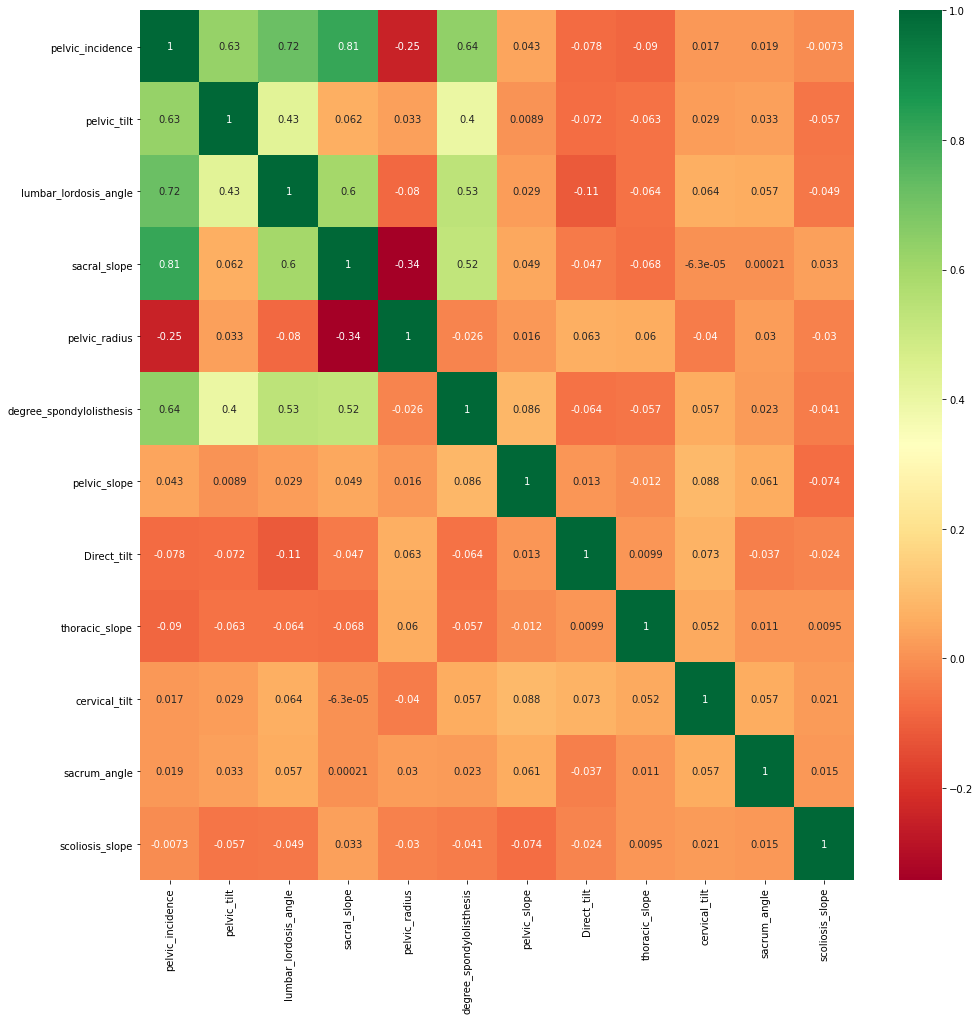

In [84]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [85]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


In [86]:
Y

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: Class_att, Length: 310, dtype: object

In [87]:
abnormal_count = Y.to_list().count("Abnormal")
normal_count = Y.to_list().count("Normal")

print("Normal count:", normal_count)
print("Abnormal count:", abnormal_count)

Normal count: 100
Abnormal count: 210


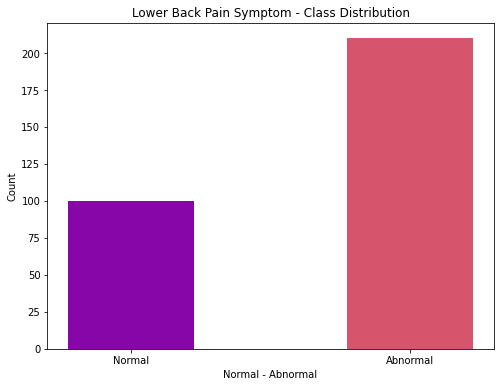

In [88]:
plt.figure(figsize=(8,6))
plt.bar(["Normal", "Abnormal"], [normal_count, abnormal_count], width=.45, color=[plt.cm.plasma(i*70) for i in range(1, 10)])
plt.title("Lower Back Pain Symptom - Class Distribution")
plt.xlabel("Normal - Abnormal")
plt.ylabel("Count")
plt.show()

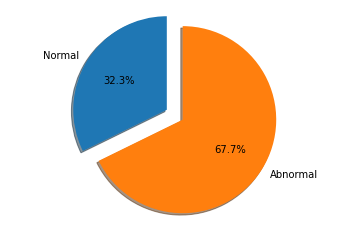

In [89]:
N = normal_count + abnormal_count
fig1, ax1 = plt.subplots()
ax1.pie([normal_count/N, abnormal_count/N], labels=["Normal", "Abnormal"], explode=(0.1, 0.1), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Gördüğümüz gibi, hedef özellikler arasında neredeyse 1/2 oran var. **100 normal** ve **210 abnormal** sınıf özellikleri bulunuyor. Satırların **32.3%**u **normal**, **67.7%**si ise**abnormal**. 

## Verilerin Hazırlanması<a class="anchor" id="data_preparation"></a>

In [90]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

labels = Y.unique()
Y= label_encoder.fit_transform(Y)

In [91]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k_best = SelectKBest(f_classif, k="all")
fit = k_best.fit(X, Y)
feature_scores = pd.DataFrame(fit.scores_)
feature_scores.sort_values
data_frame_columns = pd.DataFrame(X.columns)
feat_scores = pd.concat([data_frame_columns, feature_scores], axis=1)
feat_scores.columns = ["Features", "Score"]
print(feat_scores.nlargest(len(X.columns), 'Score'))


best_features = []
threshold = 10
for i,j in zip(feat_scores['Score'], feat_scores['Features']):
  if i > threshold:
    best_features.append(j)
selected_df = X[best_features]

                    Features      Score
5   degree_spondylolisthesis  75.494050
0           pelvic_incidence  43.938148
1                pelvic_tilt  36.641311
2      lumbar_lordosis_angle  33.329612
4              pelvic_radius  32.712134
3               sacral_slope  14.294805
9              cervical_tilt   3.113895
11           scoliosis_slope   1.486968
6               pelvic_slope   0.964259
8             thoracic_slope   0.752059
7                Direct_tilt   0.483532
10              sacrum_angle   0.222814


Özellikleri seçmek için `SelectKBest` fonksiyonu kullandık. SelectKBest'in çalışma mantığı ise, `SelectKBest` en yüksek skora sahip k adet özelliği seçiyor. Üst sınır değeri olan *treshold* değerini **10** özellikleri dinamik biçimde seçebilmek için 10 olarak belirledik. Yukarıda gördüğümüz gibi, bazı özelliklerin puanları çok yüksek, bazı özelliklerin puanları ise çok düşük. Düşük puan alan özellikleri dahil etmedik. En sonda 6 seçilmiş özellik kaldı. Bunlar, 

* degree_spondylolisthesis
* pelvic_incidence
* pelvic_tilt 
* lumbar_lordosis_angle 
* pelvic_radius
* sacral_slope

In [93]:
selected_df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_df, Y, test_size=0.33, random_state=1)

In [95]:
print("Train data size:", len(X_train))
print("Test data size:", len(X_test))

Train data size: 207
Test data size: 103


Veri kümesini eğitim ve test olarak 2 farklı parçaya ayırıyoruz. Veri kümesinin% 67'si eğitim verisi olarak ve veri kümesinin% 33'ü test verisi olmak üzere ayırıldı.

In [96]:
normalized_X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())

normalized_X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

Verilere normalleşme süreçleri uyguladık. Bu sayede geniş bir alana yayılmış olan verileri [0 1] aralığına ölçeklendirmiş olduk. Makine öğrenimi modelleri için, özellikle mesafeye dayalı modeller için normalleştirme önemlidir. Bu tür makine öğrenimi modelleri, normalleştirme verilere uygulandığında daha iyi performans gösterir veya daha hızlı eğitilir. Algoritma örnekleri şunları içerir:

* Linear regression
* Logistic regression 
* Neural networks
* Support vector machines with radial bias kernel functions
* Linear discrimant analysis


Tüm özellikler float tipindedir, bu nedenle tüm özellikler için normalleştirme uyguladık.

In [97]:
model_scores = []
model_f1_scores = []
model_recall_scores = []
model_presicion_scores = []

## Modelleme<a class="anchor" id="modeling"></a>

## Desicicon Tree Sınıflandırması 

Karar ağaçları, sınıflandırma ve regresyon için parametrik olmayan denetimli bir öğrenme modelidir. Kullanmanın bazı avantajları vardır. Çok az veri hazırlığı gerektirir. Fakat verilerin normalleşmesi sonuçları olumlu yönde çok fazla etkilemiyor. Ayrıca hem sayısal hem de kategorik verileri işleyebilir.

İlk olarak parametresiz bir `DecisionTreeClassifier` modeli oluşturduk. Daha sonra modeli `X_train` verileri ve `y_train` verilerini kullanarak eğittik. Daha sonra modelimizi eğitim süresinde görmediği veriler olan  `X_test` verileriyle test ettik. Bazı değerlendirme ölçütlerini elde ettik bunlar *accurracy*, *recall*, *precision*. Aynı zamanda confusion matrixi de çizdik. Confusion matrix  **true-positive** ve **false-positive** değerlerini görebilmek için iyi bir ölçüt. 

Accuracy: 0.7378640776699029


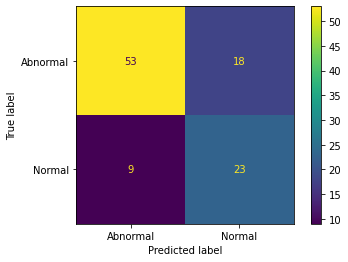

In [98]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

dt_pred = clf_dt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))
model_scores.append(("DesicionTree", metrics.accuracy_score(y_test, dt_pred)))
model_f1_scores.append(("DesicionTree", metrics.f1_score(y_test, dt_pred)))
model_recall_scores.append(("DesicionTree", metrics.recall_score(y_test, dt_pred)))
model_presicion_scores.append(("DesicionTree", metrics.precision_score(y_test, dt_pred)))


cm = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [99]:
metrics.f1_score(y_test, dt_pred)

0.6301369863013699

In [100]:
clf_dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [101]:
print(metrics.classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        71
           1       0.56      0.72      0.63        32

    accuracy                           0.74       103
   macro avg       0.71      0.73      0.71       103
weighted avg       0.76      0.74      0.75       103



In [102]:
metrics.roc_auc_score(y_test, dt_pred, average=None)

0.7326144366197184

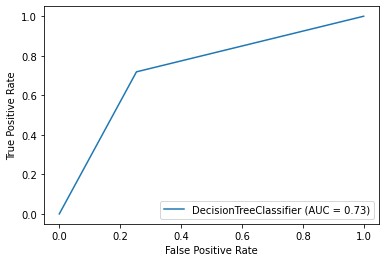

In [103]:
metrics.plot_roc_curve(clf_dt, X_test, y_test)

Bir ROC eğrisi, farklı sınıflandırma eşiklerinde Gerçek Pozitif Orana karşı Yanlış Pozitif Oranı grafiğini çizer. Sınıflandırma eşiğini düşürmek, daha fazla öğeyi pozitif olarak sınıflandırır, böylece hem Yanlış Pozitifleri hem de Doğru Pozitifleri artırır.
Gerçek Pozitif Oran 1'e yakın ve yanlış pozitif oranı 0'a yakın olduğunda ROC Eğrileri daha iyidir. Burada gördüğümüz gibi iyi görünmüyor.

Modelimizin accuracy değeri **73%** ve AUC değeri **0.73**. Ayrıca, ROC Eğrisine baktığımızda, grafiğin sol üst köşesinde bir boşluk var. *abnormal* verilerin kesinlik puanı yüksek iken, *normal* verilerin kesinlik puanı nispeten düşüktür. Karar ağacı sınıflandırıcısının daha düşük başarı ile tahmin ettiğini söyleyebiliriz.

## Support Vector Machine

Destek vektör makineleri (SVM'ler), sınıflandırma için kullanılan bir dizi denetimli öğrenme yöntemidir. 2 grubu ayırmak için en iyi sınır çizgisini bulur.

İlk olarak `svm.SVC` modelini parametresiz bir biçimde oluşturduk. Daha sonra modeli `X_train` ve `y_train` verileriyle eğittik. Daha sonra da modelin yaptığı tahminleri `y_test` değerleri ile karşılaştırarak değerlendirdik. 

Accuracy: 0.8737864077669902


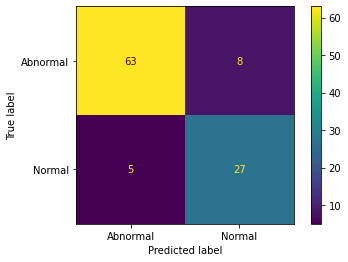

In [104]:
from sklearn import svm

SVM = svm.SVC()
SVM.fit(X_train, y_train)
svmpred = SVM.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, svmpred))
model_scores.append(("SVM", metrics.accuracy_score(y_test, svmpred)))
model_f1_scores.append(("SVM", metrics.f1_score(y_test, svmpred)))
model_recall_scores.append(("SVM", metrics.recall_score(y_test, svmpred)))
model_presicion_scores.append(("SVM", metrics.precision_score(y_test, svmpred)))

cm3 = confusion_matrix(y_test, svmpred)
cmd3 = ConfusionMatrixDisplay(cm3, display_labels = labels)
cmd3.plot()

In [105]:
SVM.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [106]:
print(metrics.classification_report(y_test, svmpred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.77      0.84      0.81        32

    accuracy                           0.87       103
   macro avg       0.85      0.87      0.86       103
weighted avg       0.88      0.87      0.88       103



In [107]:
metrics.roc_auc_score(y_test, svmpred, average=None)

0.865536971830986

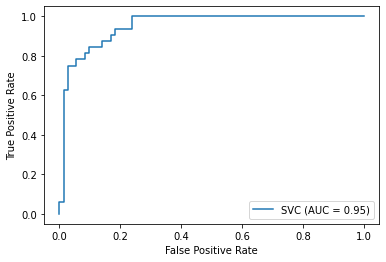

In [108]:
metrics.plot_roc_curve(SVM, X_test, y_test)

Burada ROC Eğrisi önceki modele göre daha iyi.  Mükemmel ROC eğrisine daha çok benziyor.

**SVM** modelinin accuracy değeri **87%** ve AUC değeri **0.95**. SVM, karar ağacı sınıflandırıcısından daha doğru sonuçlara sahip. ROC eğrisi grafiği daha iyidir. Grafiğin sol üst köşesine daha yakındır.Ayrıca, *anormal* sınıfının kesinlik puanı 0,93 ve *normal* sınıfının kesinlik puanı 0,77'dir Gerçek sınıfların tahmini, SVM modelinde karar ağacı sınıflandırıcısından daha yüksektir. Kısaca SVM modeli, verilerimiz için daha isabetli ve doğru sonuçlar verir. 

## Gaussian Naive Bayes

Naive Bayes, algoritmanın Bayes Teorem'i sınıf değişkeninin değeri verilen her özellik çifti arasındaki koşullu bağımsızlık saf varsayımıyla uygulamaya dayandığı farklı bir denetimli makine öğrenimi modelidir. Verilen output değeri y and bağımlı özellik vektörü $x_1$'den $x_n$ olan veriler için sınıflandır yapar.

$P(y | x_1, ..., x_n) = \frac{P(y)P(x_1, ..., x_n | y)}{P(x_1, ..., x_n)}$

Sınıflandırma kuralı kullanılarak basitleştirilebilir.

$P( y \space | \space x_1, ..., x_n) \varpropto \space P(y) \prod_{i=1}^{n}P(x_i | y) \space \Rightarrow \space \hat{y} = \underset{y}{argmaxz} P(y) \prod_{i=1}^{n}P(\space x_i | \space y) $

İlk olarak ekstra parametre vermeden bir `GaussianNB()` modeli oluşturuyoruz.Daha sonra bu modeli `X_train` ve `y_train` verileri kullanarak eğitiyoruz. Daha sonra da modelin tahmin ettiği değerleri `y_test` verileriyle karşılaştırarak modelin performansını değerlendiriyoruz. 

Accuracy: 0.8349514563106796


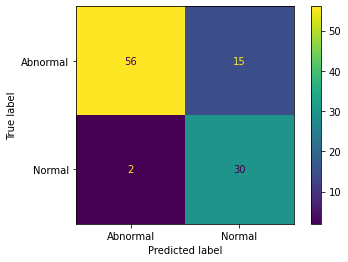

In [109]:
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()
naivemodel.fit(X_train,y_train)
naivepred = naivemodel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, naivepred))
model_scores.append(("Gaussian Naive Bayes", metrics.accuracy_score(y_test, naivepred)))
model_f1_scores.append(("Gaussian Naive Bayes", metrics.f1_score(y_test, naivepred)))
model_recall_scores.append(("Gaussian Naive Bayes", metrics.recall_score(y_test, naivepred)))
model_presicion_scores.append(("Gaussian Naive Bayes", metrics.precision_score(y_test, naivepred)))

cm7 = confusion_matrix(y_test, naivepred)
cmd7 = ConfusionMatrixDisplay(cm7, display_labels = labels)
cmd7.plot()

In [110]:
naivemodel.get_params

<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>

In [111]:
print(metrics.classification_report(y_test, naivepred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        71
           1       0.67      0.94      0.78        32

    accuracy                           0.83       103
   macro avg       0.82      0.86      0.82       103
weighted avg       0.87      0.83      0.84       103



In [112]:
metrics.roc_auc_score(y_test, naivepred, average=None)

0.8631161971830987

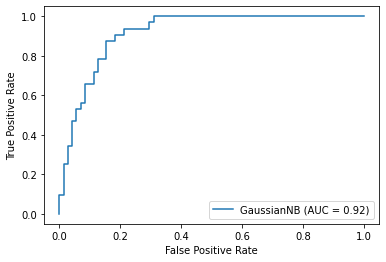

In [113]:
metrics.plot_roc_curve(naivemodel, X_test, y_test)

Burada Naive Bayes modeli ROC eğrisi SVM'den daha iyi değil ama Desicion Tree'den daha iyidir.

## Random Forest Sınıflandırması

Random Forest, sınıflandırma için toplu bir öğrenme yöntemidir. Eğitim zamanında çok sayıda karar ağacı oluşturur ve tek tek ağaçların sınıflarının modu olan sınıfı çıkarır. Random Forestlar, karar ağacının eğitim verilerine aşırı uyma(overfitting) alışkanlığına sahiptir. Her karar ağacı bir topluluk olarak çalışır.

İlk olarak parametresiz bir `RandomForestClassifier` modeli oluşturuyoruz. Ardından modeli eğitim veriyleriyle eğitip test verileri ile modelin yaptığı tahminlerin performansını ölçtük.

Accuracy: 0.8543689320388349


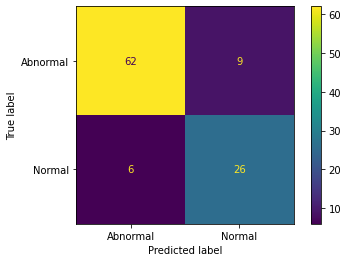

In [114]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_rfc))
model_scores.append(("RandomForest", metrics.accuracy_score(y_test, pred_rfc)))
model_f1_scores.append(("RandomForest", metrics.f1_score(y_test, pred_rfc)))
model_recall_scores.append(("RandomForest", metrics.recall_score(y_test, pred_rfc)))
model_presicion_scores.append(("RandomForest", metrics.precision_score(y_test, pred_rfc)))


cm = confusion_matrix(y_test, pred_rfc)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [115]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [116]:
print(metrics.classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        71
           1       0.74      0.81      0.78        32

    accuracy                           0.85       103
   macro avg       0.83      0.84      0.83       103
weighted avg       0.86      0.85      0.86       103



In [117]:
metrics.roc_auc_score(y_test, pred_rfc, average=None)

0.842869718309859

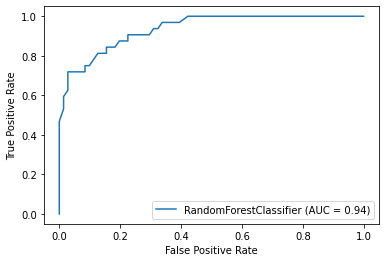

In [118]:
metrics.plot_roc_curve(rfc, X_test, y_test)

Diğer modellere yakın bir ROC eğrisi.

Random forest modelinin accuracy oranı **85%** ve AUC skoru ise **0.94**. Random forest modeli, Desicion Tree sınıflandırıcısından daha başarılıdır. Karar ağacında sadece bir ağaç eğitilirken, Random forest modelinde birden çok ağaç eğitildi. Buna rağmen SVM modeli Random Forest modelinden de iyi. Değerlendirme metriklerinde , accuracy, AUC, ve precision skorları SVM de daha iyi. Ayrıca ROC grafiğinde sol üste daha yakın. Ancak, SVM'nin ROC eğri grafiği, rastgele orman modelinden biraz daha iyidir. Anormal veriler için kesinlik puanı normal verilere göre daha iyidir. Model, anormal veriler için daha iyi tahminler yapıyor.

# K-Nearest Neighbors(k-NN)

K-NN algoritması, sınıflandırma için basit, uygulaması kolay, denetimli bir makine öğrenimi modelidir.  Algoritma olarak *birbirlerine yakın olan noktaları* gruplandırır ve ona göre karar verir.Düzlemde benzer veri noktaları birbirine yakındır, bu yüzden aynı grupta olabileceğini söyleyebiliriz. Benzerlikleri bulmak için veri noktaları arasındaki mesafeyi hesaplıyoruz. Daha sonra bu mesafeleri sıralayıp *k-nearest* noktaları gruplandırıyoruz. Sınıfın çoğunluğu, veri noktasının tahmini olacaktır. *k* değeri için genelde tek sayılar kullanılır, çünkü verinin classı yakın olan noktaların sınıfına göre değişir. *k* değerinin tek değer seçilmesi ile, eşitlik durumu ortadan kaldırılmış olur.

İlk olarak bir `KNeighborsClassifier` modeli oluşturduk ve train datalarıyla modeli eğittik. Daha sonra eğittimiz modele test verilerini vererek tahmin etmesini sağladık. Modeli yaratırken hiç bir parametre vermedik. *k* değerini ise **5** aldık. Bu yüzden modelimiz **5-NN** ile eğitildi ve test edildi. 



Accuracy: 0.8640776699029126


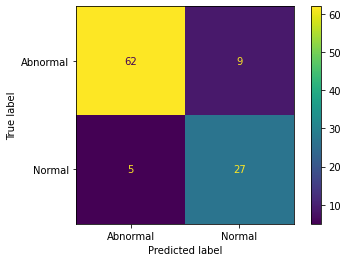

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_knn))
model_scores.append(("KNeighbors", metrics.accuracy_score(y_test, pred_knn)))
model_f1_scores.append(("KNeighbors", metrics.f1_score(y_test, pred_knn)))
model_recall_scores.append(("KNeighbors", metrics.recall_score(y_test, pred_knn)))
model_presicion_scores.append(("KNeighbors", metrics.precision_score(y_test, pred_knn)))


cm = confusion_matrix(y_test, pred_knn)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [120]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [121]:
print(metrics.classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        71
           1       0.75      0.84      0.79        32

    accuracy                           0.86       103
   macro avg       0.84      0.86      0.85       103
weighted avg       0.87      0.86      0.87       103



In [122]:
metrics.roc_auc_score(y_test, pred_knn, average=None)

0.8584947183098591

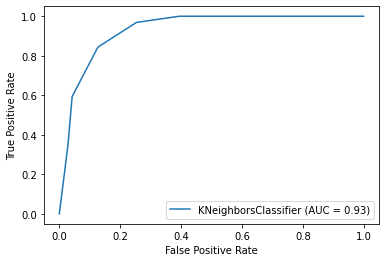

In [123]:
metrics.plot_roc_curve(knn, X_test, y_test)


ROC Eğrisi pürüzsüz görünüyor ancak genel performans daha iyi değil.

Modelin accuracy değeri **86%** ve AUC skoru ise **93%**. 
Ayrıca, hassasiyet puanları yüksek. Sonuçlar SVM ve random forests modeline benzer. ROC eğrisi, grafiğin sol üst kısmına yakındır. SVM and random forests modellerine kıyasla çok da bir fark yok. 

# Logistic Regression 

Bağımlı değişken (hedef) kategorik olduğunda lojistik regresyon kullanılabilir. Algoritma ikili çıktı verilerini sınıflandırır. 
Bu nedenle lojistik regresyon veri setimiz için uygundur, çünkü sadece 2 olası sonuca sahibiz, bunlar ise *normal* ve *abnormal*.Logistic Regression modeli *logistic function* dan dolayı isimlendirilmiştir. Verilerin sınıfını belirlemek için logistic fonksiyonu yani sigmoid fonksiyonu kullanılıyor. 

![img](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png) 

**Sigmoid function:** $\sigma(z) = \frac{1}{1+e^{-z}}$

Değerler, 0 ile 1 arasındaki bir değerle eşlenir.

Accuracy: 0.883495145631068


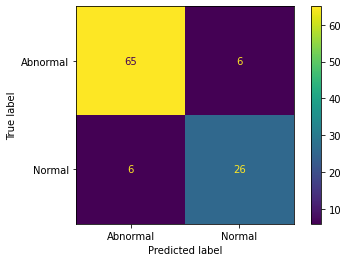

In [124]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_lr))
base_accuracy = metrics.accuracy_score(y_test, pred_lr)
model_scores.append(("LogisticRegression", metrics.accuracy_score(y_test, pred_lr)))
model_f1_scores.append(("LogisticRegression", metrics.f1_score(y_test, pred_lr)))
model_recall_scores.append(("LogisticRegression", metrics.recall_score(y_test, pred_lr)))
model_presicion_scores.append(("LogisticRegression", metrics.precision_score(y_test, pred_lr)))


cm = confusion_matrix(y_test, pred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [125]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [126]:
print(metrics.classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        71
           1       0.81      0.81      0.81        32

    accuracy                           0.88       103
   macro avg       0.86      0.86      0.86       103
weighted avg       0.88      0.88      0.88       103



In [127]:
metrics.roc_auc_score(y_test, pred_lr, average=None)

0.8639964788732395

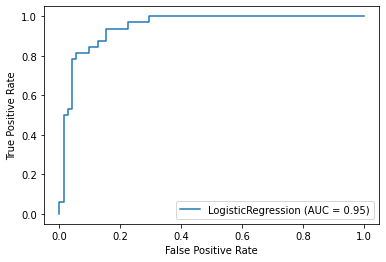

In [128]:
metrics.plot_roc_curve(lr, X_test, y_test)

Sahip olduğumuz en iyi görünen ROC Eğrilerinden biri. Mükemmel modellere çok benziyor.

Denediğimiz modeller arasındaki en iyi model Logistic Regression modeliydi. Modelimiz **88%** accuracy değerine ve **95%** AUC skoru değerine sahip. Ayrıca, hassasiyet puanları da yüksek.Abnormal durumlar için **92%** precision skoru ve normal datalar için **81%** precision skoruna sahip. Verisetimizde *abnormal* durumların sayısı *normal* olan durumlardan fazla o yüzden daha yüksek kesinlik puanı eşit olmayan bir şekilde dağılmış olarak açıklanabilir. Aynı zamanda da ROC eğrisi sol üste yakın. 1.0'a yakın olması her zaman daha iyidir. 

In [129]:
model_scores

[('DesicionTree', 0.7378640776699029),
 ('SVM', 0.8737864077669902),
 ('Gaussian Naive Bayes', 0.8349514563106796),
 ('RandomForest', 0.8543689320388349),
 ('KNeighbors', 0.8640776699029126),
 ('LogisticRegression', 0.883495145631068)]

In [130]:
acc = []
name = []
for x in model_scores:
  acc.append(x[1])
  name.append(x[0])

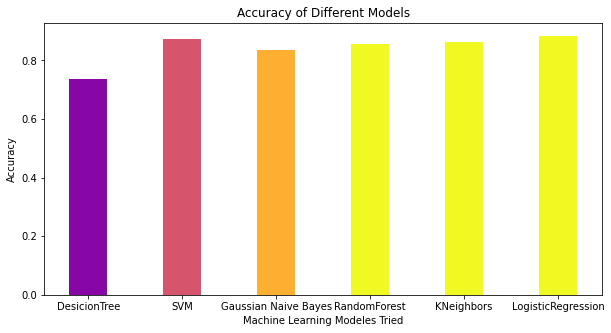

In [131]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()

In [132]:
acc = []
name = []
for x in model_f1_scores:
  acc.append(x[1])
  name.append(x[0])

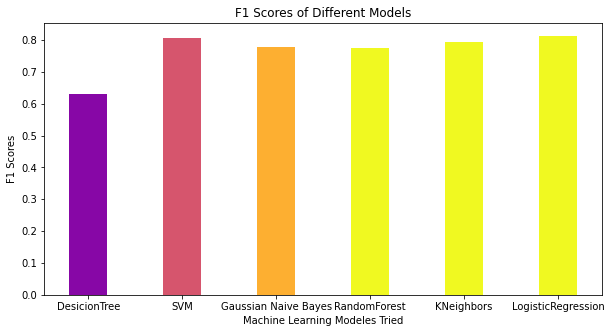

In [133]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("F1 Scores")
plt.title("F1 Scores of Different Models")
plt.show()

In [134]:
acc = []
name = []
for x in model_recall_scores:
  acc.append(x[1])
  name.append(x[0])

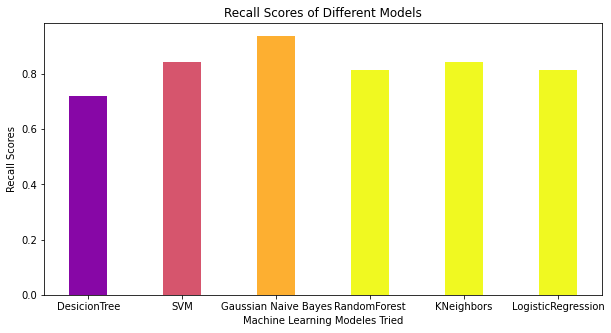

In [135]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("Recall Scores")
plt.title("Recall Scores of Different Models")
plt.show()

In [136]:
acc = []
name = []
for x in model_presicion_scores:
  acc.append(x[1])
  name.append(x[0])

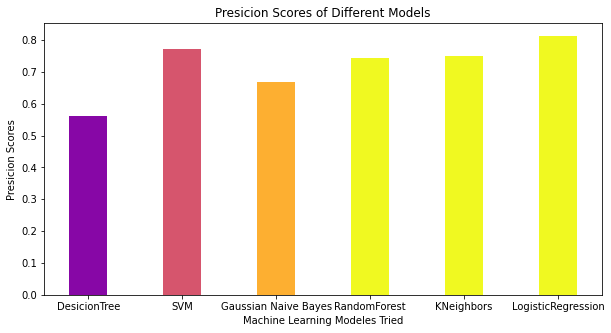

In [137]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("Presicion Scores")
plt.title("Presicion Scores of Different Models")
plt.show()

## Değerlendirme<a class="anchor" id="evaluation"></a>

Temel modelimiz olarak Logical Regression seçtikten sonra, modele Hyperparameter Tuning uygulayarak modelimizi geliştirmeye karar verdik. Makine öğreniminde bir modeli geliştirmek için 2 seçeneğimiz var. Birincisi, daha fazla veri toplamak ve feature engineering yapmaktır. Diğer bir yol ise parametrelerle oynamak ve Hyperparameter Tuning yapmaktır. Modelimiz için daha iyi parametreler bulmaya odaklandık.

Bunu yapmak için, en iyi ortalama test puanına sahip en iyi modeli seçmek için, farklı parametrelere sahip bir grup farklı modeli eğitmek için GridSearchCv kullandık. GridSearchCv'nin yaptığı şey, yukarıda tanımladığımız parametrelerle bir sürü yeni model oluşturmaktır, böylece verilen değerler aralığı için farklı modeller değerlendirilir ve en iyisi seçilir ve en iyi modelin parametrelerini döndürür.

In [138]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832222 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.830635 (0.086652) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830635 (0.086652) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832222 (0.082846) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.830635 (0.086652) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830635 (0.086652) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.826190 (0.084777) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.830635 (0.086652) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830635 (0.086652) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787143 (0.098220) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.829048 (0.086588) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829048 (0.086588) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.780714 (0.099967) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.827540 (0.088840) wit

Accuracy: 0.8932038834951457


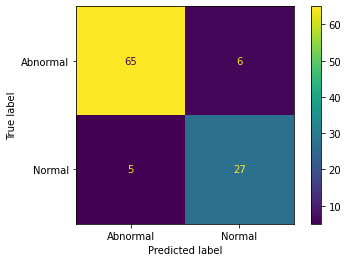

In [139]:
lr = LogisticRegression(C = 100.0, penalty='l2', solver = 'liblinear')

lr = lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_lr))
grid_accuracy = metrics.accuracy_score(y_test, pred_lr)
#model_f1_scores.append(("LogisticRegression", metrics.f1_score(y_test, pred_lr)))
#model_recall_scores.append(("LogisticRegression", metrics.recall_score(y_test, pred_lr)))
#model_presicion_scores.append(("LogisticRegression", metrics.precision_score(y_test, pred_lr)))


cm = confusion_matrix(y_test, pred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

En iyi parametrelere sahip modeli bulduktan sonra yukarıda kullandığımız temel model ile karşılaştırıyoruz ve bu iki modelin accuracy değeri arasındaki gelişmeyi buluyoruz.

In [140]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.10%.


Biraz gelişme kaydettik. Küçük görünebilir, ancak bunun nedeni verilerimizin o kadar büyük olmamasıdır. Daha büyük projelerde bu, modelin doğruluğu üzerinde çok daha fazla etkiye sahip olacak ve Hyperparameter tuning çok fazla etkisi olacaktır.

In [141]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)>

In [142]:
print(metrics.classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.82      0.84      0.83        32

    accuracy                           0.89       103
   macro avg       0.87      0.88      0.88       103
weighted avg       0.89      0.89      0.89       103



In [143]:
metrics.roc_auc_score(y_test, pred_lr, average=None)

0.8796214788732395

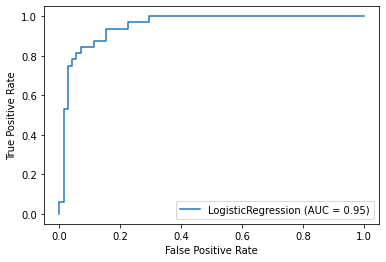

In [144]:
metrics.plot_roc_curve(lr, X_test, y_test)

## Referanslar<a class="anchor" id="references"></a>

[1] https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset 

[2] https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

[3] https://scikit-learn.org/stable/modules/tree.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[5] https://scikit-learn.org/stable/modules/svm.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

[7] https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

[8] https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

[9] https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

[10] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

[11] https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


**Disclaimer!** <font color='grey'>This notebook was prepared by Gökhan Özeloğlu and Ali Kayadibi as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>